In [1]:
import json
file = open('./input/data.json', 'r', encoding='utf-8')
data = json.load(file)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import koreanize_matplotlib

In [3]:
# Parse personal data
combined_rows = []

# Match entries by totalScore and grade
for stat_id, stat_data in data["statistics"].items():
    for stu_id, stu_data in data["students"].items():
        if (stat_data["grade"] == stu_data["studentGrade"] and
            stat_data["totalScore"] == stu_data["totalScore"] and
                stat_data["scores"] == stu_data["scores"]):

            row = {
                "ID_stat": stat_id,
                "ID_student": stu_id,
                "Gender": stat_data.get("gender"),
                "Grade": stat_data.get("grade"),
                "SurveyTime": stat_data.get("date"),
                "ParsedTime": stu_data.get("parsedDate"),
                "TotalScore": stat_data.get("totalScore")
            }
            # Include category scores
            row.update(stat_data["scores"])
            combined_rows.append(row)
            break

# Convert to DataFrame
df_combined = pd.DataFrame(combined_rows)

# Print final table
print(df_combined.to_string(index=False))

             ID_stat           ID_student Gender Grade SurveyTime         ParsedTime  TotalScore  Î∂àÏïà Î∞è Ïö∞Ïö∏ Î¨∏Ï†ú  Ïã¨Î¶¨Ïô∏ÏÉÅ Î¨∏Ï†ú  Ïô∏ÌòÑÌôî Î¨∏Ï†ú  ÏûêÏÇ¥ Î∞è ÏúÑÍ∏∞ Î¨∏Ï†ú  ÌïôÍµêÏÉùÌôúÏ†ÅÏùë Î¨∏Ï†ú
-ORO3afgAtqlPL9nX2G5 -ORO3afb_TN98Kofxvo2   girl   2ÌïôÎÖÑ  5Ïõî 29Ïùº 7Ïãú  2025-5-29 7:45:26          80          24       14       9          18         15
-ORO42E6AZfcaferUZKV -ORO42E2e1pii41jNKbl   girl   1ÌïôÎÖÑ  5Ïõî 29Ïùº 7Ïãú  2025-5-29 7:47:23           0           0        0       0           0          0
-ORO47TnvMiiv0gHk-3i -ORO47TjdZ_5jV43PcXi    boy   2ÌïôÎÖÑ  5Ïõî 29Ïùº 7Ïãú  2025-5-29 7:47:45           4           0        0       2           0          2
-ORO4eKQsY3AF-Cji_Rk -ORO4eKMBcwY5NWfbf_9   girl   2ÌïôÎÖÑ  5Ïõî 29Ïùº 7Ïãú   2025-5-29 7:50:3           7           6        0       0           0          1
-ORO5pZyLjX3rRv7QpeL -ORO5pZuPnJomqtF8JFn    boy   1ÌïôÎÖÑ  5Ïõî 29Ïùº 7Ïãú  2025-5-29 7:55:12          19           9        4       3           0  

C:\Users\user\AppData\Local\Temp\ipykernel_17036\4274103204.py:32: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


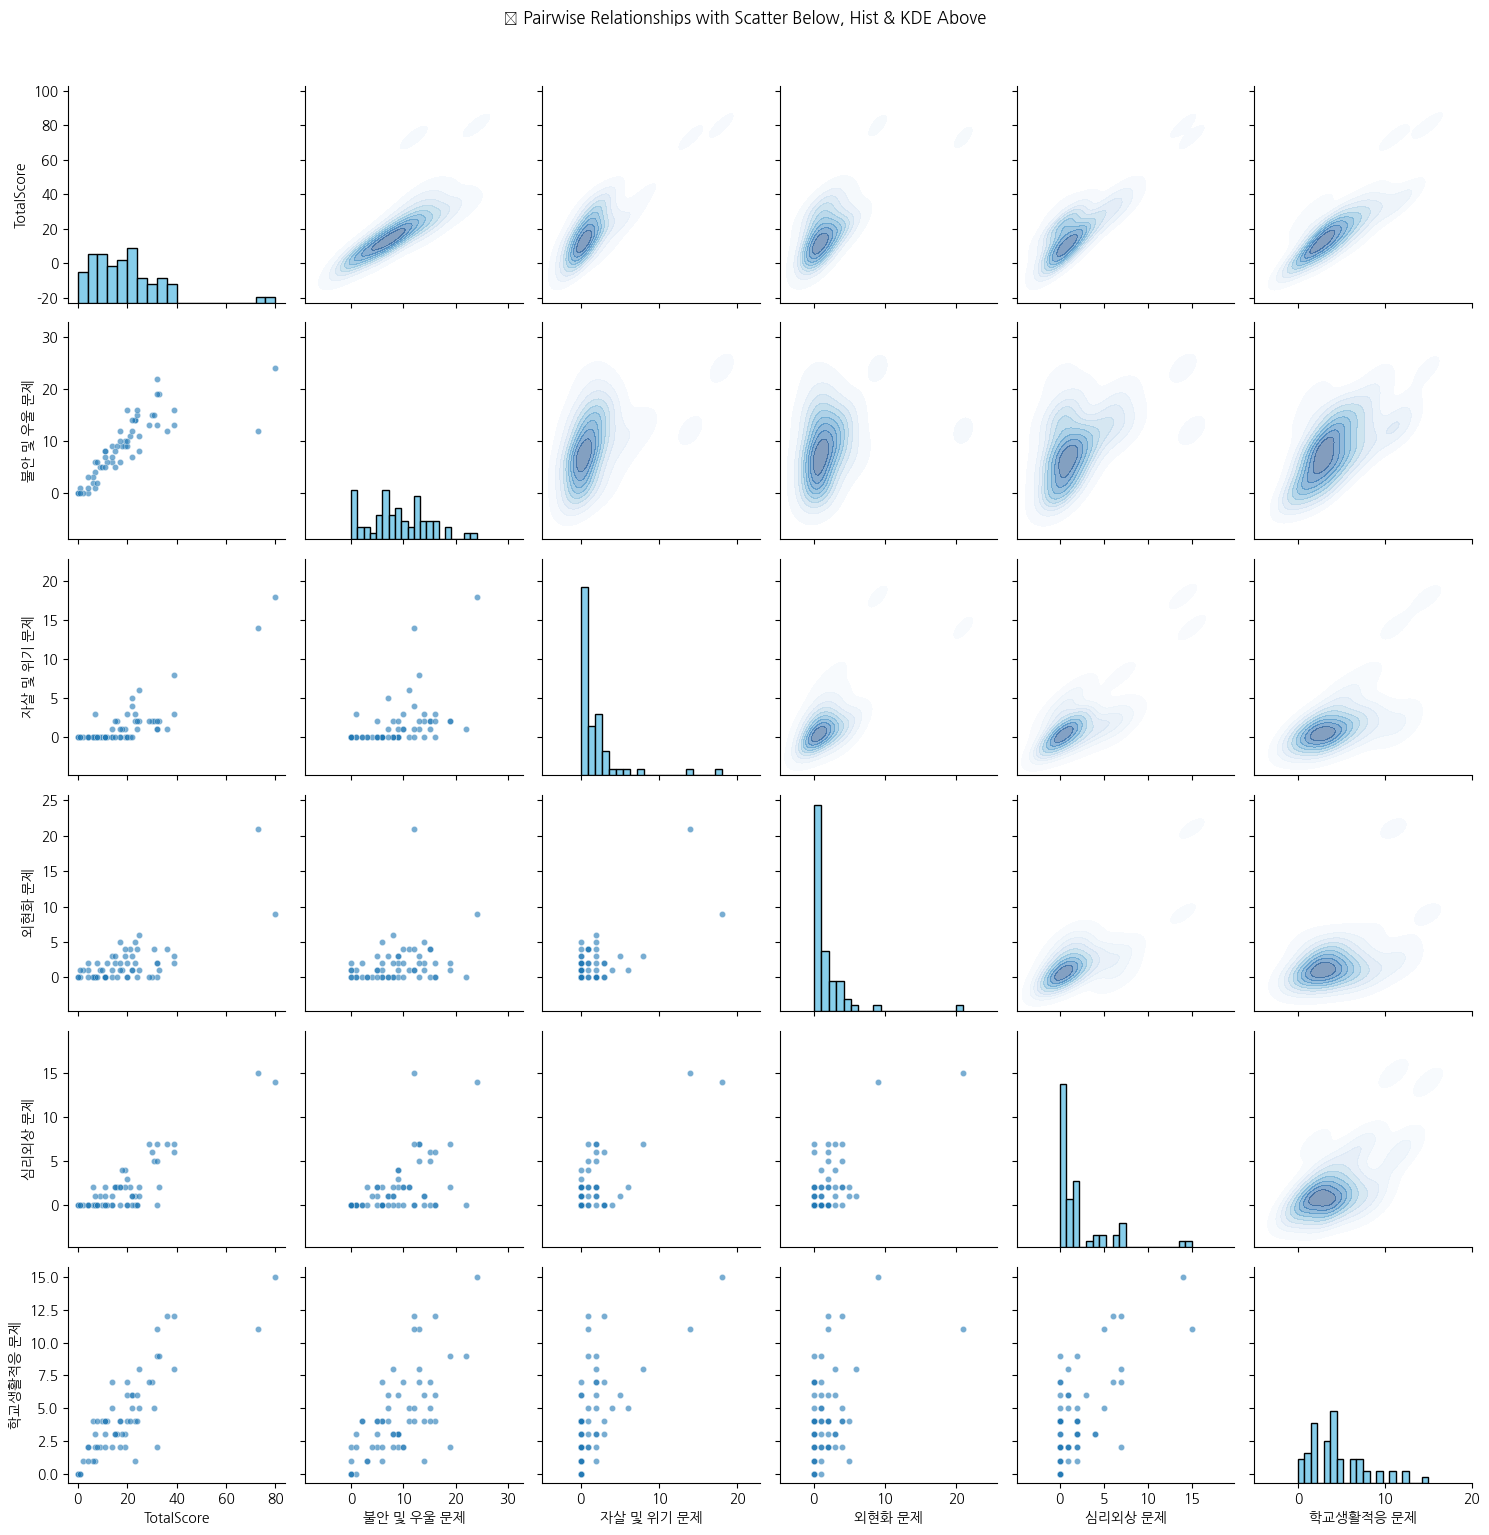

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Score columns
score_columns = [
    "TotalScore",
    "Î∂àÏïà Î∞è Ïö∞Ïö∏ Î¨∏Ï†ú",
    "ÏûêÏÇ¥ Î∞è ÏúÑÍ∏∞ Î¨∏Ï†ú",
    "Ïô∏ÌòÑÌôî Î¨∏Ï†ú",
    "Ïã¨Î¶¨Ïô∏ÏÉÅ Î¨∏Ï†ú",
    "ÌïôÍµêÏÉùÌôúÏ†ÅÏùë Î¨∏Ï†ú"
]

# Subset
subset = df_combined[score_columns]

# Set up PairGrid
g = sns.PairGrid(subset)

# Scatter plot on lower triangle
g.map_lower(sns.scatterplot, alpha=0.6, s=20)

# Histogram on diagonal
g.map_diag(plt.hist, bins=20, color="skyblue", edgecolor="black")

# KDE contour plot on upper triangle
g.map_upper(sns.kdeplot, fill=True, cmap="Blues", alpha=0.5)

# Title
plt.suptitle(
    "üî∑ Pairwise Relationships with Scatter Below, Hist & KDE Above", y=1.02)
plt.tight_layout()
plt.show()

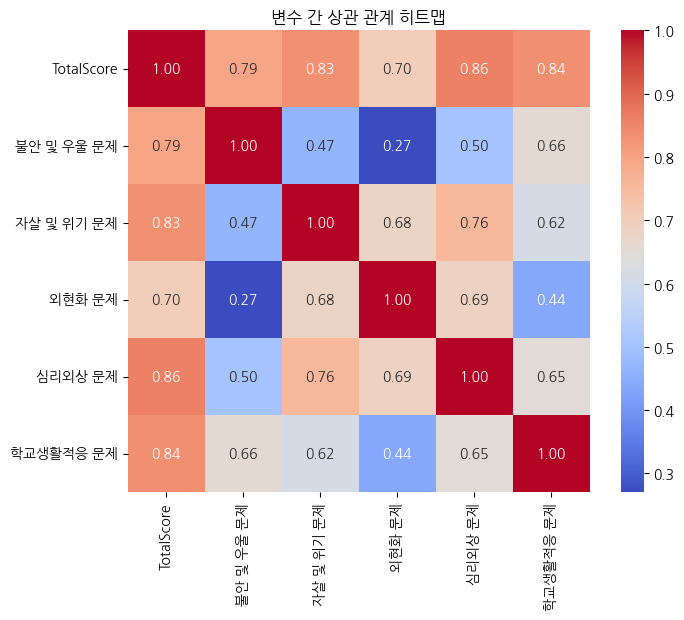

In [5]:
import numpy as np

# Compute correlation matrix
corr = subset.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ ÌûàÌä∏Îßµ")
plt.show()

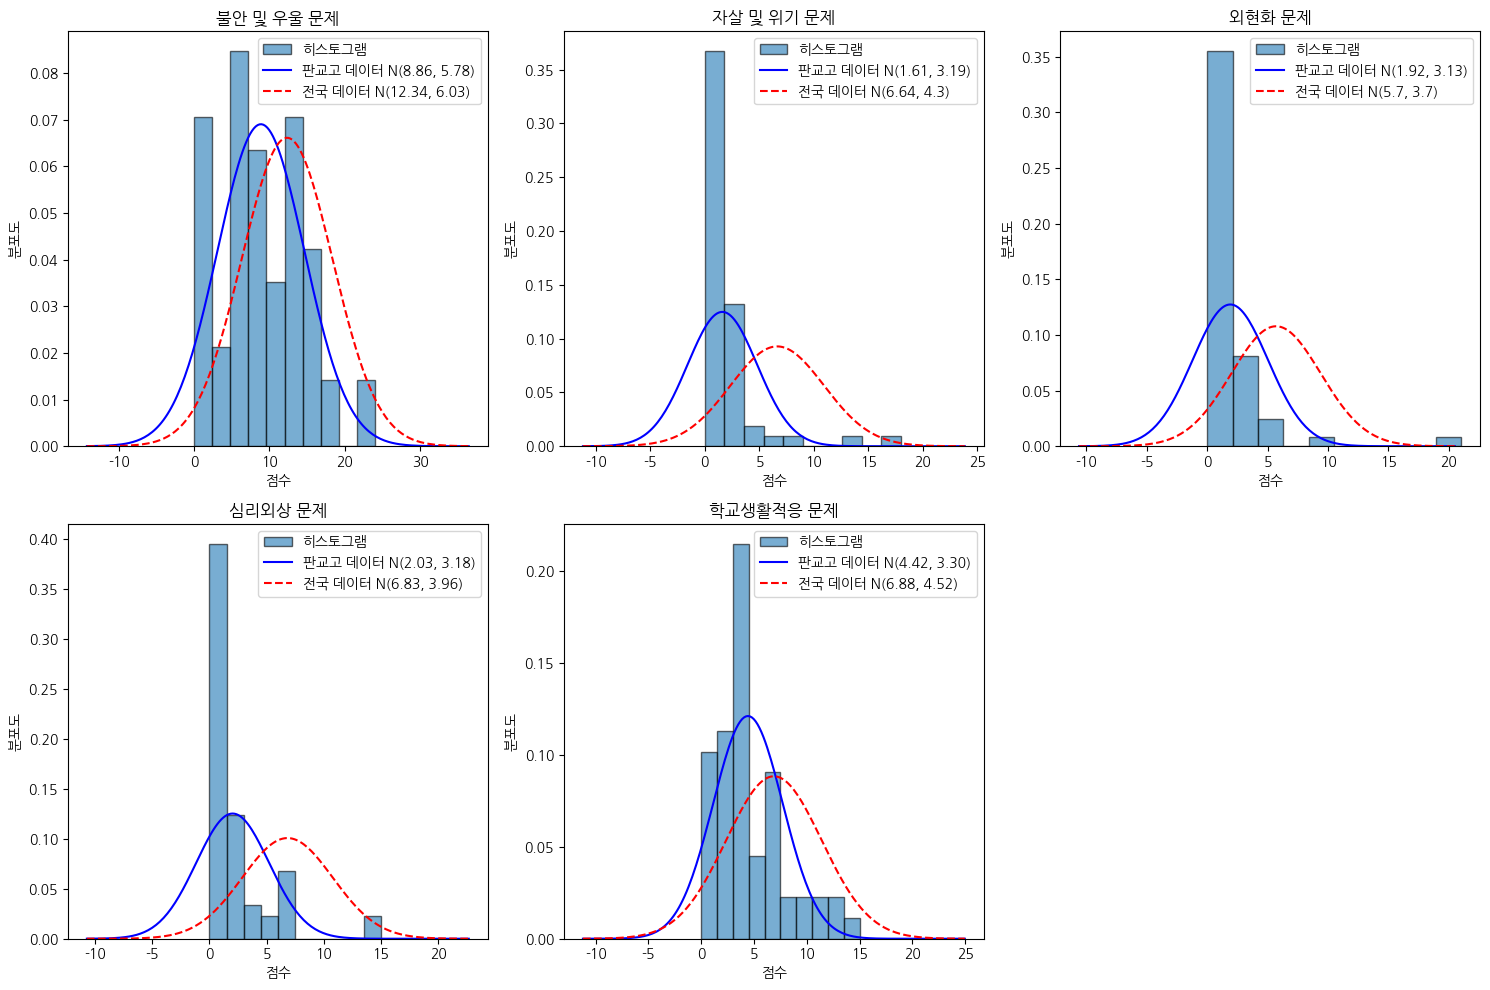

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define subcategory score columns
score_columns = [
    "Î∂àÏïà Î∞è Ïö∞Ïö∏ Î¨∏Ï†ú",
    "ÏûêÏÇ¥ Î∞è ÏúÑÍ∏∞ Î¨∏Ï†ú",
    "Ïô∏ÌòÑÌôî Î¨∏Ï†ú",
    "Ïã¨Î¶¨Ïô∏ÏÉÅ Î¨∏Ï†ú",
    "ÌïôÍµêÏÉùÌôúÏ†ÅÏùë Î¨∏Ï†ú"
]

# Baseline (reference) means and standard deviations for comparison
baseline_params = {
    "Î∂àÏïà Î∞è Ïö∞Ïö∏ Î¨∏Ï†ú": (12.34, 6.03),
    "ÏûêÏÇ¥ Î∞è ÏúÑÍ∏∞ Î¨∏Ï†ú": (6.64, 4.30),
    "Ïô∏ÌòÑÌôî Î¨∏Ï†ú": (5.70, 3.70),
    "Ïã¨Î¶¨Ïô∏ÏÉÅ Î¨∏Ï†ú": (6.83, 3.96),
    "ÌïôÍµêÏÉùÌôúÏ†ÅÏùë Î¨∏Ï†ú": (6.88, 4.52)
}

# Plot
plt.figure(figsize=(15, 10))

for i, col in enumerate(score_columns, 1):
    data = df_combined[col]
    mu = data.mean()
    sigma = data.std()

    # Get baseline parameters
    mu2, sigma2 = baseline_params[col]

    # Create a common x-axis range that includes both distributions
    x_min = min(mu - 4*sigma, mu2 - 4*sigma2)
    x_max = max(mu + 4*sigma, mu2 + 4*sigma2)
    x = np.linspace(x_min, x_max, 200)

    y1 = norm.pdf(x, mu, sigma)
    y2 = norm.pdf(x, mu2, sigma2)

    # Plot
    plt.subplot(2, 3, i)
    plt.hist(data, bins=10, density=True, alpha=0.6,
             edgecolor='black', label="ÌûàÏä§ÌÜ†Í∑∏Îû®")
    plt.plot(x, y1, label=f'ÌåêÍµêÍ≥† Îç∞Ïù¥ÌÑ∞ N({mu:.2f}, {sigma:.2f})', color='blue')
    plt.plot(
        x, y2, label=f'Ï†ÑÍµ≠ Îç∞Ïù¥ÌÑ∞ N({mu2}, {sigma2})', linestyle='--', color='red')
    plt.title(col)
    plt.xlabel("Ï†êÏàò")
    plt.ylabel("Î∂ÑÌè¨ÎèÑ")
    plt.legend()

plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17036\1863409511.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_combined.groupby(['Grade', 'Gender'])[col].agg([


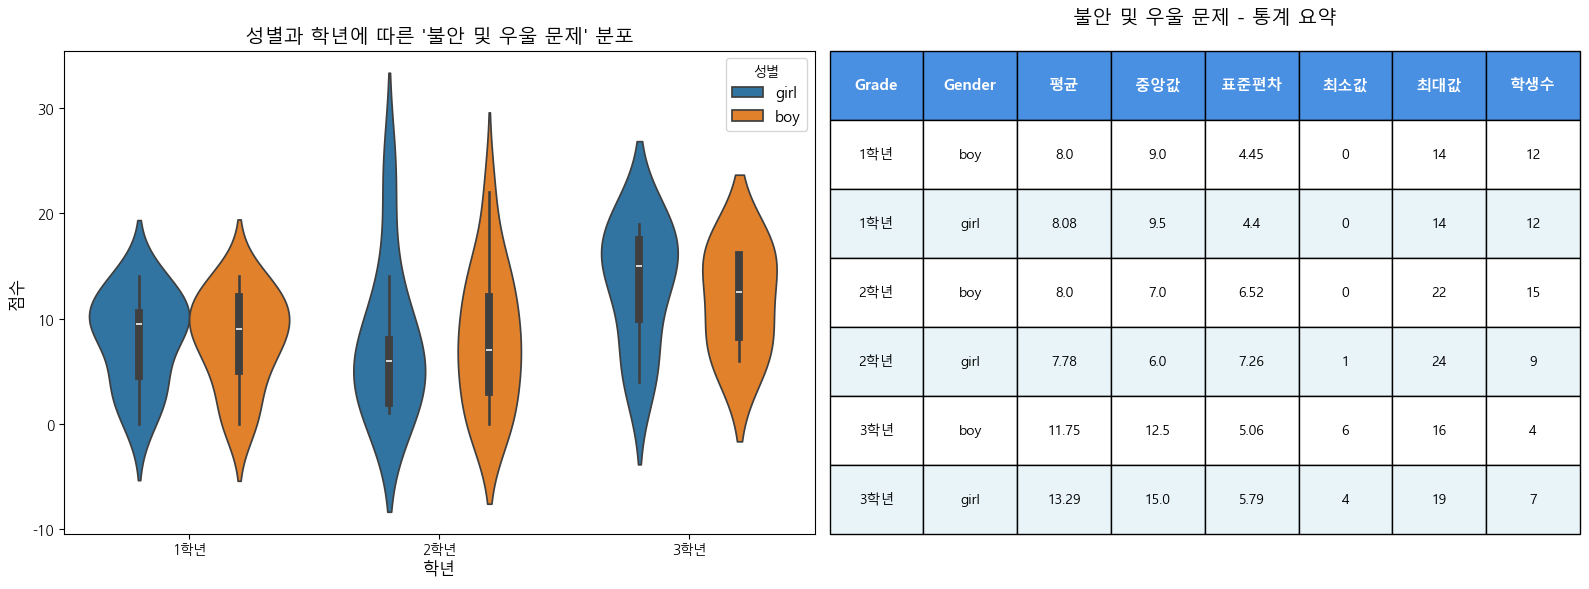

C:\Users\user\AppData\Local\Temp\ipykernel_17036\1863409511.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_combined.groupby(['Grade', 'Gender'])[col].agg([


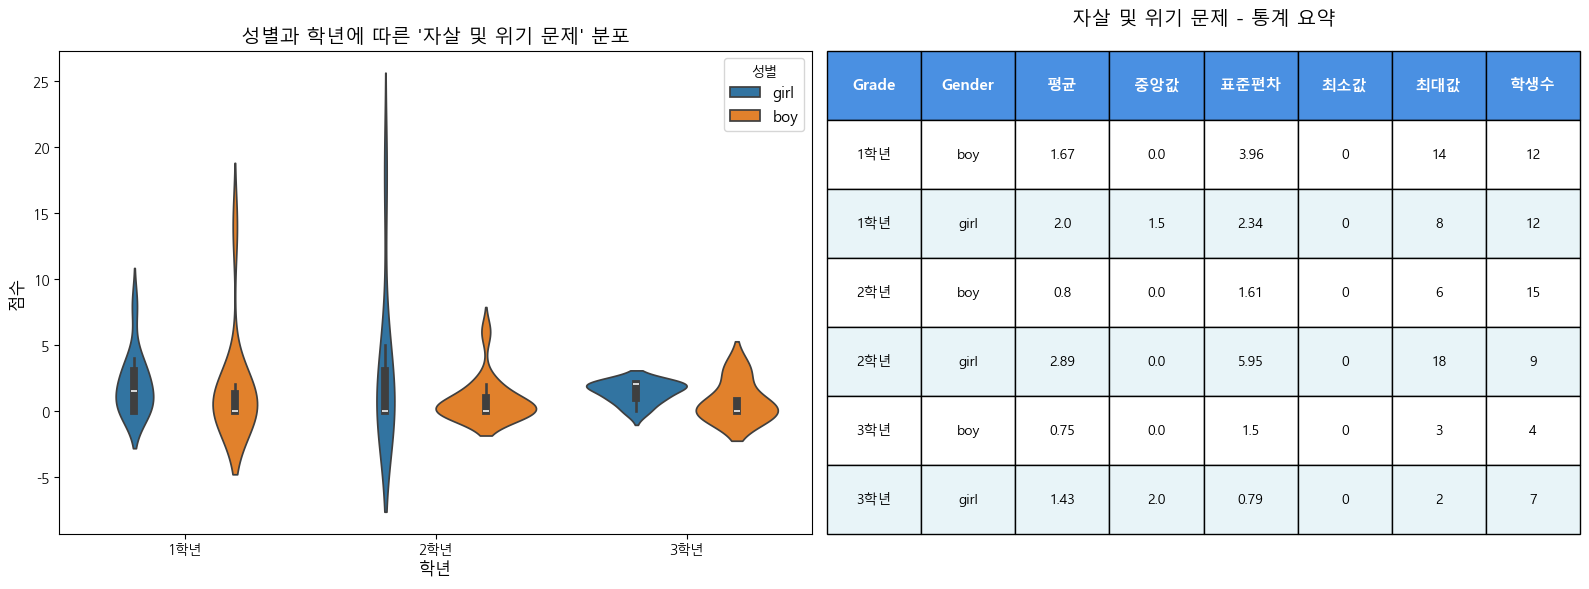

C:\Users\user\AppData\Local\Temp\ipykernel_17036\1863409511.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_combined.groupby(['Grade', 'Gender'])[col].agg([


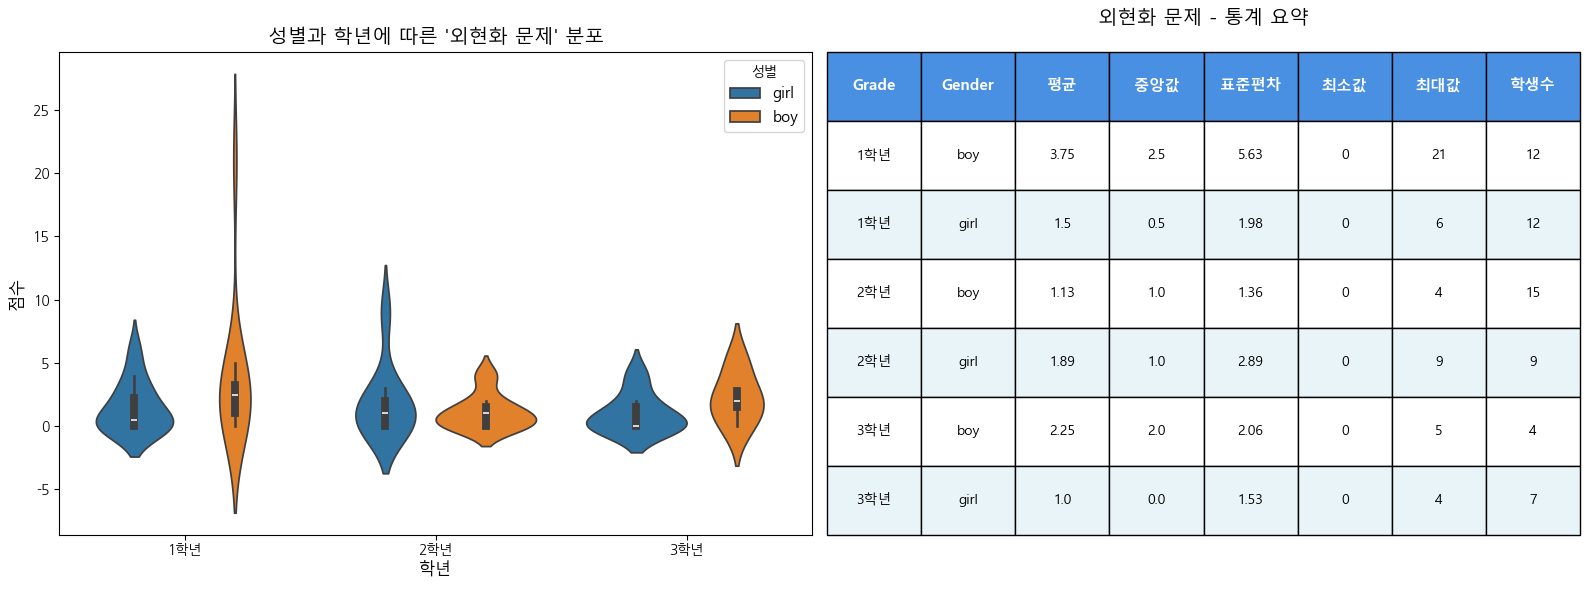

C:\Users\user\AppData\Local\Temp\ipykernel_17036\1863409511.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_combined.groupby(['Grade', 'Gender'])[col].agg([


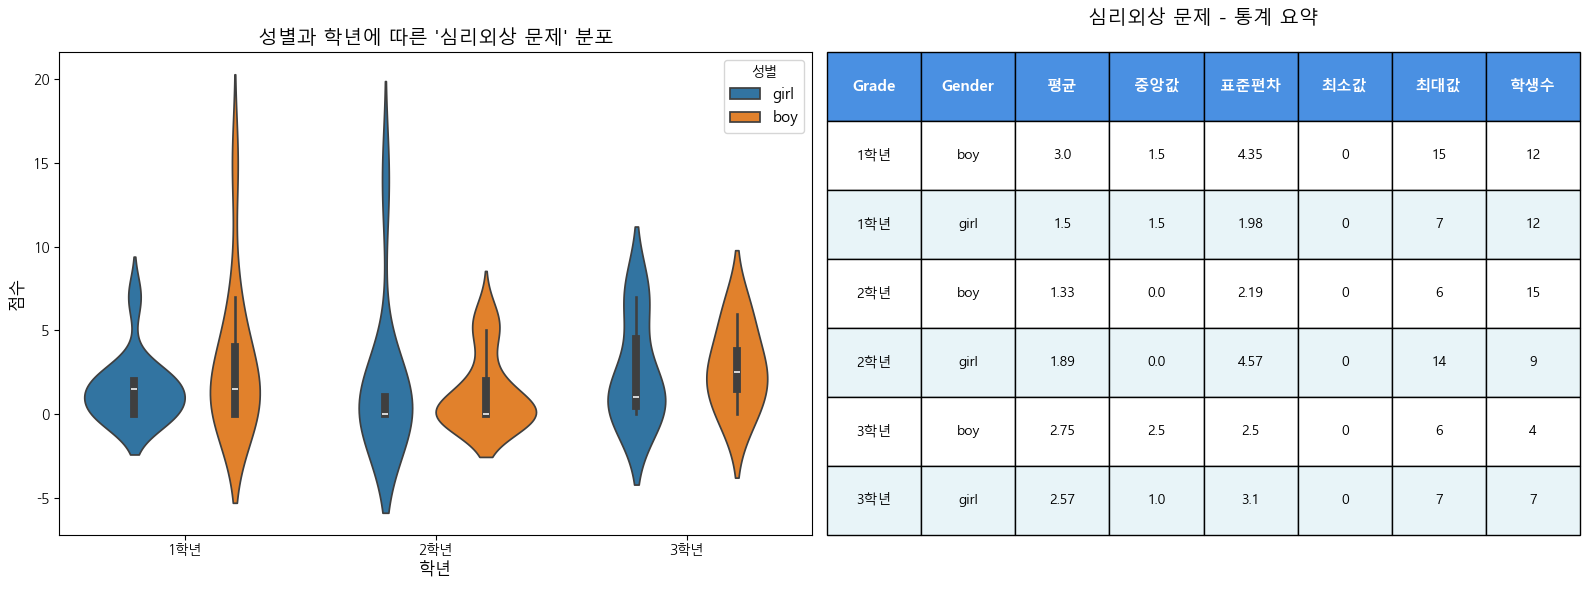

C:\Users\user\AppData\Local\Temp\ipykernel_17036\1863409511.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_combined.groupby(['Grade', 'Gender'])[col].agg([


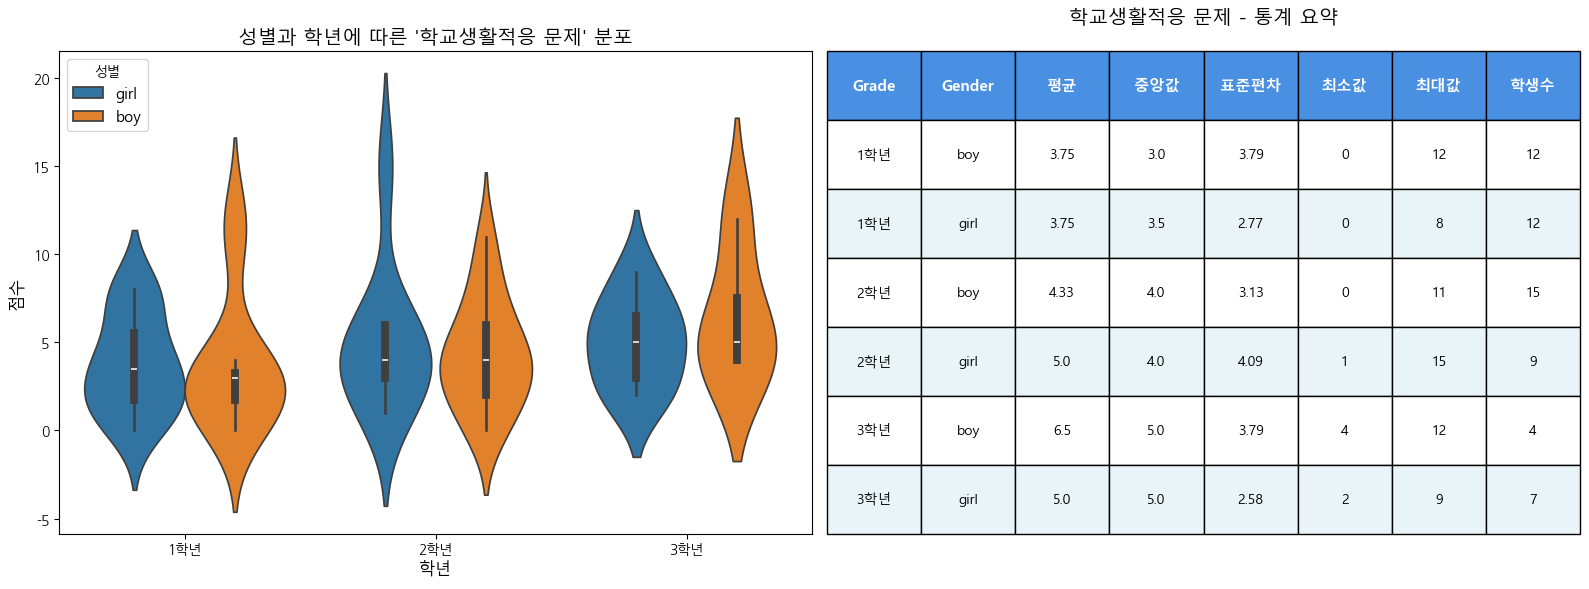

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define subcategory score columns
score_columns = [
    "Î∂àÏïà Î∞è Ïö∞Ïö∏ Î¨∏Ï†ú",
    "ÏûêÏÇ¥ Î∞è ÏúÑÍ∏∞ Î¨∏Ï†ú",
    "Ïô∏ÌòÑÌôî Î¨∏Ï†ú",
    "Ïã¨Î¶¨Ïô∏ÏÉÅ Î¨∏Ï†ú",
    "ÌïôÍµêÏÉùÌôúÏ†ÅÏùë Î¨∏Ï†ú"
]

# Ensure Grade is treated as an ordered category
df_combined["Grade"] = pd.Categorical(df_combined["Grade"], ordered=True)

# Plot for each category
for col in score_columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Violin plot
    sns.violinplot(x="Grade", y=col, hue="Gender", data=df_combined, ax=ax1)
    ax1.set_title(f"ÏÑ±Î≥ÑÍ≥º ÌïôÎÖÑÏóê Îî∞Î•∏ '{col}' Î∂ÑÌè¨",
                  fontsize=14, fontfamily='Malgun Gothic')
    ax1.set_xlabel("ÌïôÎÖÑ", fontsize=12, fontfamily='Malgun Gothic')
    ax1.set_ylabel("Ï†êÏàò", fontsize=12, fontfamily='Malgun Gothic')
    ax1.legend(title="ÏÑ±Î≥Ñ", prop={'family': 'Malgun Gothic', 'size': 11})

    # Summary table
    ax2.axis('tight')
    ax2.axis('off')

    # Calculate statistics
    summary_stats = df_combined.groupby(['Grade', 'Gender'])[col].agg([
        ('ÌèâÍ∑†', 'mean'),
        ('Ï§ëÏïôÍ∞í', 'median'),
        ('ÌëúÏ§ÄÌé∏Ï∞®', 'std'),
        ('ÏµúÏÜåÍ∞í', 'min'),
        ('ÏµúÎåÄÍ∞í', 'max'),
        ('ÌïôÏÉùÏàò', 'count')
    ]).round(2).reset_index()

    # Create table
    table = ax2.table(cellText=summary_stats.values,
                      colLabels=summary_stats.columns,
                      cellLoc='center',
                      loc='center',
                      bbox=[0, 0, 1, 1])

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2.5)

    # Style header
    for i in range(len(summary_stats.columns)):
        table[(0, i)].set_facecolor('#4A90E2')
        table[(0, i)].set_text_props(weight='bold', color='white',
                                     fontfamily='Malgun Gothic', fontsize=11)

    # Alternate row colors
    for i in range(1, len(summary_stats) + 1):
        for j in range(len(summary_stats.columns)):
            if i % 2 == 0:
                table[(i, j)].set_facecolor('#E8F4F8')
            table[(i, j)].set_text_props(fontfamily='Malgun Gothic')

    ax2.set_title(f'{col} - ÌÜµÍ≥Ñ ÏöîÏïΩ',
                  fontsize=14, fontfamily='Malgun Gothic', pad=20)

    plt.tight_layout()
    plt.show()